In [3]:
"""
Machine Learning Courework

This coursework assesses ability to demonstrate understanding of a wide range of machine learning techniques, their strengths and
their limitations, and write code in a relevant programming language and employ software libraries to solve problems
in machine learning. For this coursework you will be selecting, implementing, and evaluating classification methods for a
given scenario and dataset.

Scenario: You are given a dataset of images, each of which has been classified as either ‘rainy’ or ‘shine’. You must carry out an
experiment to compare the performance of at least two different classification methods on this dataset. 

The deliverable is an individual report with a 3-page maximum detailing your experiment and results –
this is a hard limit however your references will not count to this maximum.

Report structure:
Introduction: Excellent introduction detailing the scenario, objective and the process in a succinct manner. 5%
Method Selection: Excellent description of at least two appropriate methods with good justifications. 10%
Model Training: Excellent overview of data, process and justifications for training and hyperparameter tuning. 25%
Model Evaluation: Excellent overview of the evaluation process and data with suitable and justified metrics. 25%
Results: Excellent analysis and presentation of the results with good contextualisation and interpretation. 25%
Conclusions: Contextualised conclusions with clear links to results leading to potential future work. 10%

Classification methods I have learnt about:
1. Support Vector Machines (SVM)
2. Decision Trees
3. Random Forest
4. K-Nearest Neighbours (KNN)
5. Naive Bayes
6. Neural Networks
7. Logistic 

features.npy – Contains the flattened images. Each row consists of 45000 columns each
representing a pixel value in the original image. classes.npy – Contains the respective classifications for the images found in ‘features.npy’, these
are 0 for ‘rainy’ images and 1 for ‘shine’ images. 248 ‘shine’ images and 299 ‘rain’ images"""

'\nMachine Learning Courework\n\nThis coursework assesses ability to demonstrate understanding of a wide range of machine learning techniques, their strengths and\ntheir limitations, and write code in a relevant programming language and employ software libraries to solve problems\nin machine learning. For this coursework you will be selecting, implementing, and evaluating classification methods for a\ngiven scenario and dataset.\n\nScenario: You are given a dataset of images, each of which has been classified as either ‘rainy’ or ‘shine’. You must carry out an\nexperiment to compare the performance of at least two different classification methods on this dataset. \n\nThe deliverable is an individual report with a 3-page maximum detailing your experiment and results –\nthis is a hard limit however your references will not count to this maximum.\n\nReport structure:\nIntroduction: Excellent introduction detailing the scenario, objective and the process in a succinct manner. 5%\nMethod Se

In [4]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, f1_score, roc_auc_score, roc_curve
from tabulate import tabulate
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers


features = np.load("features.npy")
labels = np.load("classes.npy")

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

image_height = 100
image_width = 150
num_channels = 3


In [12]:
def evaluate_models(models, X_test, y_test):
    results = []

    for model_name, model in models:
        if model_name == "CNN":
            y_pred = np.argmax(model.predict(X_test), axis=1)
            y_score = model.predict(X_test)[:, 1].ravel()
        else:
            # Reshape input data for non-CNN models
            X_test_flat = X_test.reshape(X_test.shape[0], -1)
            y_pred = model.predict(X_test_flat)
            y_score = model.predict_proba(X_test_flat)[:,1]
        
        accuracy = "{:.4f}".format(accuracy_score(y_test, y_pred))
        precision = "{:.4f}".format(precision_score(y_test, y_pred))
        recall = "{:.4f}".format(recall_score(y_test, y_pred))
        f1 = "{:.4f}".format(f1_score(y_test, y_pred))
        auc_roc = "{:.4f}".format(roc_auc_score(y_test, y_score))
        
        results.append([model_name, accuracy, precision, recall, f1, auc_roc])

    # Create a table
    table = tabulate(results, headers=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'], tablefmt='grid')

    print(table)

    # Save the table to a file
    with open('model_performance.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
        for result in results:
            writer.writerow(result)

    # Plot ROC curves 
    plt.figure(figsize=(10, 6))
    for model_name, model in models:
        if model_name == "CNN":
            y_score = model.predict(X_test)[:, 1].ravel()
        else:
            y_score = model.predict_proba(X_test_flat)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.plot(fpr, tpr, label=model_name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [6]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [7]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
# Reshape input data
X_train = X_train.reshape(-1, image_height, image_width, num_channels)
X_test = X_test.reshape(-1, image_height, image_width, num_channels)

# Rest of your code
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming binary classification (rainy and shine)
])

num_epochs = 10

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=num_epochs)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)

Epoch 1/10


c:\Users\thoma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.4935 - loss: 219.1612
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7798 - loss: 0.6322
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9456 - loss: 0.2633
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9264 - loss: 0.2388
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9645 - loss: 0.3009
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8767 - loss: 2.2926
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9664 - loss: 0.1343
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9771 - loss: 0.1480
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9940 - loss: 0.0417
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9936 - loss: 0.0604
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9552 - loss: 0.5998


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
+---------------+------------+-------------+----------+------------+-----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |   AUC-ROC |
+===============+============+=============+==========+============+===========+
| SVM           |     0.9818 |      0.9767 |   0.9767 |     0.9767 |    0.9844 |
+---------------+------------+-------------+----------+------------+-----------+
| Random Forest |     0.9091 |      0.9459 |   0.814  |     0.875  |    0.9879 |
+---------------+------------+-------------+----------+------------+-----------+
| Decision Tree |     0.8909 |      0.8444 |   0.8837 |     0.8636 |    0.9058 |
+---------------+------------+-------------+----------+------------+-----------+
| CNN           |     0.9636 |      0.9535 |   0.9535 |     0.9535 |    0.9604 |
+---------------+------------+-------------+----------+------------+-----------+
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/

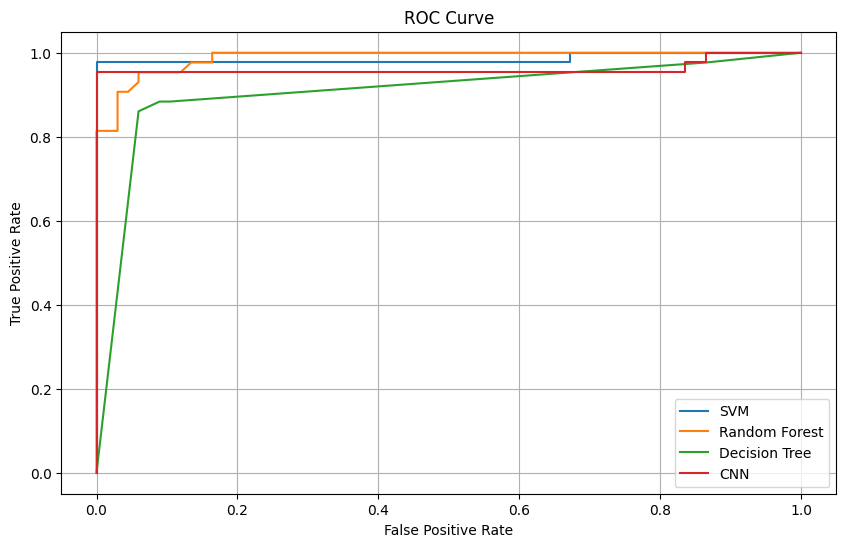

In [13]:
models = [("SVM", svm_model), ("Random Forest", rf_model), ("Decision Tree", dt_model), ("CNN", cnn_model)]
evaluate_models(models, X_test, y_test)

In [ ]:
#print("Model Evaluation Results:")
#print(tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Classification Report"]))
